In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import string
import numpy as np
import pandas as pd

2023-09-17 13:48:36.541264: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
!wget --no-check-certificate \
https://drive.google.com/uc?id=1LiJFZd41ofrWoBtW-pMYsfz1w8Ny0Bj8 \-O /tmp/songdata.csv

zsh:1: no matches found: https://drive.google.com/uc?id=1LiJFZd41ofrWoBtW-pMYsfz1w8Ny0Bj8


In [3]:
def tokenize_corpus(corpus,num_words=-1):
    if num_words>-1:
        tokenizer = Tokenizer(num_words=num_words)
    else:
        tokenizer = Tokenizer()
    tokenizer.fit_on_texts(corpus)
    return tokenizer

In [4]:
def create_lyrics_corpus(dataset,field):
    dataset[field] = dataset[field].str.replace('[{}]'.format(string.punctuation),'')
    dataset[field] = dataset[field].str.lower()
    lyrics = dataset[field].str.cat()
    corpus = lyrics.split('\n')
    for l in range(len(corpus)):
        corpus[l] = corpus[l].rstrip()
    corpus = [l for l in corpus if l != '']
    return corpus

In [5]:
dataset = pd.read_csv('songdata.csv',dtype=str)[:10]

In [6]:
dataset

,artist,song,link,text
0,ABBA,Ahe's My Kind Of Girl,/a/abba/ahes+my+kind+of+girl_20598417.html,"Look at her face, it's a wonderful face \nAnd..."
1,ABBA,"Andante, Andante",/a/abba/andante+andante_20002708.html,"Take it easy with me, please \nTouch me gentl..."
2,ABBA,As Good As New,/a/abba/as+good+as+new_20003033.html,I'll never know why I had to go \nWhy I had t...
3,ABBA,Bang,/a/abba/bang_20598415.html,Making somebody happy is a question of give an...
4,ABBA,Bang-A-Boomerang,/a/abba/bang+a+boomerang_20002668.html,Making somebody happy is a question of give an...
5,ABBA,Burning My Bridges,/a/abba/burning+my+bridges_20003011.html,"Well, you hoot and you holler and you make me ..."
6,ABBA,Cassandra,/a/abba/cassandra_20002811.html,Down in the street they're all singing and sho...
7,ABBA,Chiquitita,/a/abba/chiquitita_20002978.html,"Chiquitita, tell me what's wrong \nYou're enc..."
8,ABBA,Crazy World,/a/abba/crazy+world_20003013.html,I was out with the morning sun \nCouldn't sle...
9,ABBA,Crying Over You,/a/abba/crying+over+you_20177611.html,I'm waitin' for you baby \nI'm sitting all al...


In [7]:
corpus = create_lyrics_corpus(dataset,'text')

/var/folders/01/v1qj51yd35d93xs2n4_9qms80000gn/T/ipykernel_36760/1476050029.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  dataset[field] = dataset[field].str.replace('[{}]'.format(string.punctuation),'')


In [8]:
corpus

['look at her face its a wonderful face',
 'and it means something special to me',
 'look at the way that she smiles when she sees me',
 'how lucky can one fellow be',
 'shes just my kind of girl she makes me feel fine',
 'who could ever believe that she could be mine',
 'shes just my kind of girl without her im blue',
 'and if she ever leaves me what could i do what could i do',
 'and when we go for a walk in the park',
 'and she holds me and squeezes my hand',
 'well go on walking for hours and talking',
 'about all the things that we plan',
 'shes just my kind of girl she makes me feel fine',
 'who could ever believe that she could be mine',
 'shes just my kind of girl without her im blue',
 'and if she ever leaves me what could i do what could i do',
 'take it easy with me please',
 'touch me gently like a summer evening breeze',
 'take your time make it slow',
 'andante andante',
 'just let the feeling grow',
 'make your fingers soft and light',
 'let your body be the velvet of th

In [9]:
len(corpus)

341

In [10]:
tokenizer = tokenize_corpus(corpus)
total_words = len(tokenizer.word_index)+1

In [11]:
print(total_words)

495


In [12]:
sequences = []
for line in corpus:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1,len(token_list)):
        n_gram_sequence = token_list[:i+1]
        sequences.append(n_gram_sequence)

In [13]:
max_sequence_len = max([len(seq) for seq in sequences])
max_sequence_len

20

In [14]:
sequences = np.array(pad_sequences(sequences,maxlen=max_sequence_len,padding='pre'))
input_sequences, labels = sequences[:,:-1],sequences[:,-1]

In [15]:
one_hot_labels = tf.keras.utils.to_categorical(labels,num_classes=total_words)

In [16]:
print(tokenizer.word_index['know'])

32


In [17]:
print(tokenizer.word_index['feeling'])

97


In [18]:
print(input_sequences[5])

[  0   0   0   0   0   0   0   0   0   0   0   0   0  81  82 142 197  29
   4]


In [19]:
print(input_sequences[6])

[  0   0   0   0   0   0   0   0   0   0   0   0  81  82 142 197  29   4
 287]


In [20]:
print(one_hot_labels[5])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

In [21]:
print(one_hot_labels[6])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding,LSTM,Dense,Bidirectional

In [23]:
model = Sequential()
model.add(Embedding(total_words,64,input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(20)))
model.add(Dense(total_words,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
history = model.fit(input_sequences,one_hot_labels,epochs=200)

2023-09-17 13:48:42.847679: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/200
62/62 [==============================] - 3s 10ms/step - loss: 6.0167 - accuracy: 0.0368
Epoch 2/200
62/62 [==============================] - 1s 12ms/step - loss: 5.4463 - accuracy: 0.0399
Epoch 3/200
62/62 [==============================] - 1s 10ms/step - loss: 5.3705 - accuracy: 0.0399
Epoch 4/200
62/62 [==============================] - 1s 10ms/step - loss: 5.3150 - accuracy: 0.0419
Epoch 5/200
62/62 [==============================] - 1s 11ms/step - loss: 5.2408 - accuracy: 0.0414
Epoch 6/200
62/62 [==============================] - 1s 11ms/step - loss: 5.1659 - accuracy: 0.0540
Epoch 7/200
62/62 [==============================] - 1s 12ms/step - loss: 5.0903 - accuracy: 0.0515
Epoch 8/200
62/62 [==============================] - 1s 13ms/step - loss: 5.0165 - accuracy: 0.0580
Epoch 9/200
62/62 [==============================] - 1s 11ms/step - loss: 4.9264 - accuracy: 0.0701
Epoch 10/200
62/62 [==============================] - 1s 11ms/step - loss: 4.8367 - accuracy: 0.0777

62/62 [==============================] - 1s 10ms/step - loss: 1.1529 - accuracy: 0.7795
Epoch 83/200
62/62 [==============================] - 1s 10ms/step - loss: 1.1273 - accuracy: 0.7820
Epoch 84/200
62/62 [==============================] - 1s 10ms/step - loss: 1.0943 - accuracy: 0.7836
Epoch 85/200
62/62 [==============================] - 1s 10ms/step - loss: 1.0658 - accuracy: 0.7851
Epoch 86/200
62/62 [==============================] - 1s 10ms/step - loss: 1.0560 - accuracy: 0.7896
Epoch 87/200
62/62 [==============================] - 1s 11ms/step - loss: 1.0329 - accuracy: 0.8027
Epoch 88/200
62/62 [==============================] - 1s 10ms/step - loss: 1.0228 - accuracy: 0.8088
Epoch 89/200
62/62 [==============================] - 1s 10ms/step - loss: 1.0135 - accuracy: 0.8083
Epoch 90/200
62/62 [==============================] - 1s 9ms/step - loss: 1.0335 - accuracy: 0.7972
Epoch 91/200
62/62 [==============================] - 1s 10ms/step - loss: 1.0145 - accuracy: 0.7957
Epoc

62/62 [==============================] - 1s 9ms/step - loss: 0.4359 - accuracy: 0.8946
Epoch 163/200
62/62 [==============================] - 1s 10ms/step - loss: 0.4284 - accuracy: 0.8940
Epoch 164/200
62/62 [==============================] - 1s 10ms/step - loss: 0.4237 - accuracy: 0.8971
Epoch 165/200
62/62 [==============================] - 1s 10ms/step - loss: 0.4195 - accuracy: 0.8976
Epoch 166/200
62/62 [==============================] - 1s 10ms/step - loss: 0.4189 - accuracy: 0.8925
Epoch 167/200
62/62 [==============================] - 1s 9ms/step - loss: 0.4382 - accuracy: 0.8829
Epoch 168/200
62/62 [==============================] - 1s 12ms/step - loss: 0.4215 - accuracy: 0.8915
Epoch 169/200
62/62 [==============================] - 1s 13ms/step - loss: 0.4173 - accuracy: 0.8915
Epoch 170/200
62/62 [==============================] - 1s 11ms/step - loss: 0.4147 - accuracy: 0.8946
Epoch 171/200
62/62 [==============================] - 1s 10ms/step - loss: 0.4036 - accuracy: 0.8

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [25]:
def plot_graphs(history,string):
    plt.plot(history.history[string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.show()

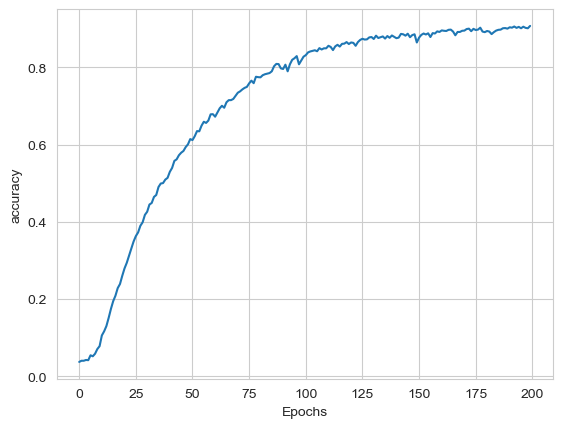

In [26]:
plot_graphs(history,'accuracy')

In [27]:
seed_text = "i m feeling chills"
next_words = 100
for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list],maxlen=max_sequence_len-1,padding='pre')
    predicted = np.argmax(model.predict(token_list),axis=-1)
    output_word = ""
    for word,index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    seed_text += ' '+output_word
print(seed_text)

1/1 [==============================] - 0s 22ms/step
i m feeling chills it as as good as new my love for you have you what could good care new dimension thought mistake thought mistake mistake life chiquitita new dimension break break life is break love is song chiquitita dumb break boomaboomerang love for a song eyes father youll life is youll do learn eyes blue eyes advice could here to love life is here youll learn new do do what could here i am found again cause i found out that for you leave me girl girl girl she smart sorrow caught be life is mistake here to being slack here to
